In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
df = pd.read_csv('../data/bayut/cleaned/ready_flats_clean.csv', converters={'amenities': literal_eval})
df.set_index('listing_id', inplace=True)

In [3]:
df['price'] = df['price'] / 1000

bins = [0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
cats = pd.cut(df['price'], bins)
print(pd.value_counts(cats))

(1000, 2000]     8992
(500, 1000]      6411
(2000, 3000]     4811
(0, 500]         3136
(3000, 4000]     2507
(4000, 5000]     1366
(5000, 6000]      655
(6000, 7000]      332
(7000, 8000]      238
(8000, 9000]      148
(9000, 10000]      72
Name: price, dtype: int64


<IPython.core.display.Javascript object>


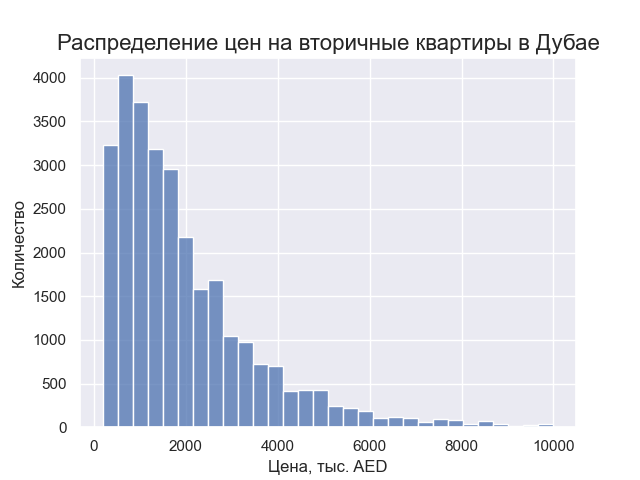

Text(0.5, 1.0, 'Распределение цен на вторичные квартиры в Дубае')

In [4]:
sns.histplot(df[(df['price'] <= 10000)]['price'].astype(float), bins=30)
plt.xlabel('Цена, тыс. AED')
plt.ylabel('Количество')
plt.title('Распределение цен на вторичные квартиры в Дубае', size=16)

In [5]:
plt.savefig('../images/readyf_price_distribution.png')

In [6]:
df.describe()

,price,beds,baths,surface,lat,long,completion_year,floor,price_sqf,views,discounted,cheap,distressed,investment,tenanted,vacant,metro,furnished,condition,luxury
count,29065.000000,27438.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,785.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000
mean,2175.330286,1.703368,2.352658,1282.094151,25.116131,55.225343,445.005539,14.913376,1559.136563,0.466541,0.007156,0.029589,0.004576,0.108171,0.082367,0.126234,0.016377,0.147256,0.129365,0.065749
std,2688.622259,0.902764,1.076154,811.203942,0.067443,0.076173,834.447300,36.403985,895.048941,0.498888,0.084294,0.169453,0.067492,0.310602,0.274928,0.332119,0.126923,0.354367,0.335609,0.247847
min,190.000000,0.000000,0.000000,96.000000,24.862205,54.949708,0.000000,1.000000,50.064368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,845.000000,1.000000,2.000000,790.000000,25.068199,55.147157,0.000000,3.000000,925.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1500.000000,2.000000,2.000000,1135.000000,25.099138,55.230321,0.000000,7.000000,1364.197531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2650.000000,2.000000,3.000000,1600.000000,25.187137,55.276277,0.000000,17.000000,1943.198804,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83200.000000,6.000000,7.000000,26514.000000,25.290725,55.441713,2025.000000,502.000000,13415.101571,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
